EDA

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv('data/adult.csv')

In [80]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [81]:
data.shape

(32561, 15)

In [82]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [83]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [85]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [86]:
data.duplicated().sum()

24

In [87]:
data.drop_duplicates(inplace=True)

In [88]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [89]:
# Rename the columns. Eg: 'marital.status' to 'marital_status'
data.columns = data.columns.str.replace('.', '_')
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [90]:
# Separate categorical and numerical columns
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(exclude=['object']).columns

In [91]:
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [92]:
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [93]:
# Fetch unique values and value counts of each categorical column
for col in categorical_features:
    print(f'{col} : {data[col].nunique()} unique values')
    print(data[col].unique())
    print('\n')

workclass : 9 unique values
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


education : 16 unique values
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


marital_status : 7 unique values
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation : 15 unique values
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


relationship : 6 unique values
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']


race : 5 unique values
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


sex : 2 unique values
[

In [94]:
# Remove ? and replace with mode value
data['workclass'] = data['workclass'].replace('?', data['workclass'].mode()[0])
data['occupation'] = data['occupation'].replace('?', data['occupation'].mode()[0])
data['native_country'] = data['native_country'].replace('?', data['native_country'].mode()[0])

Data Visualization

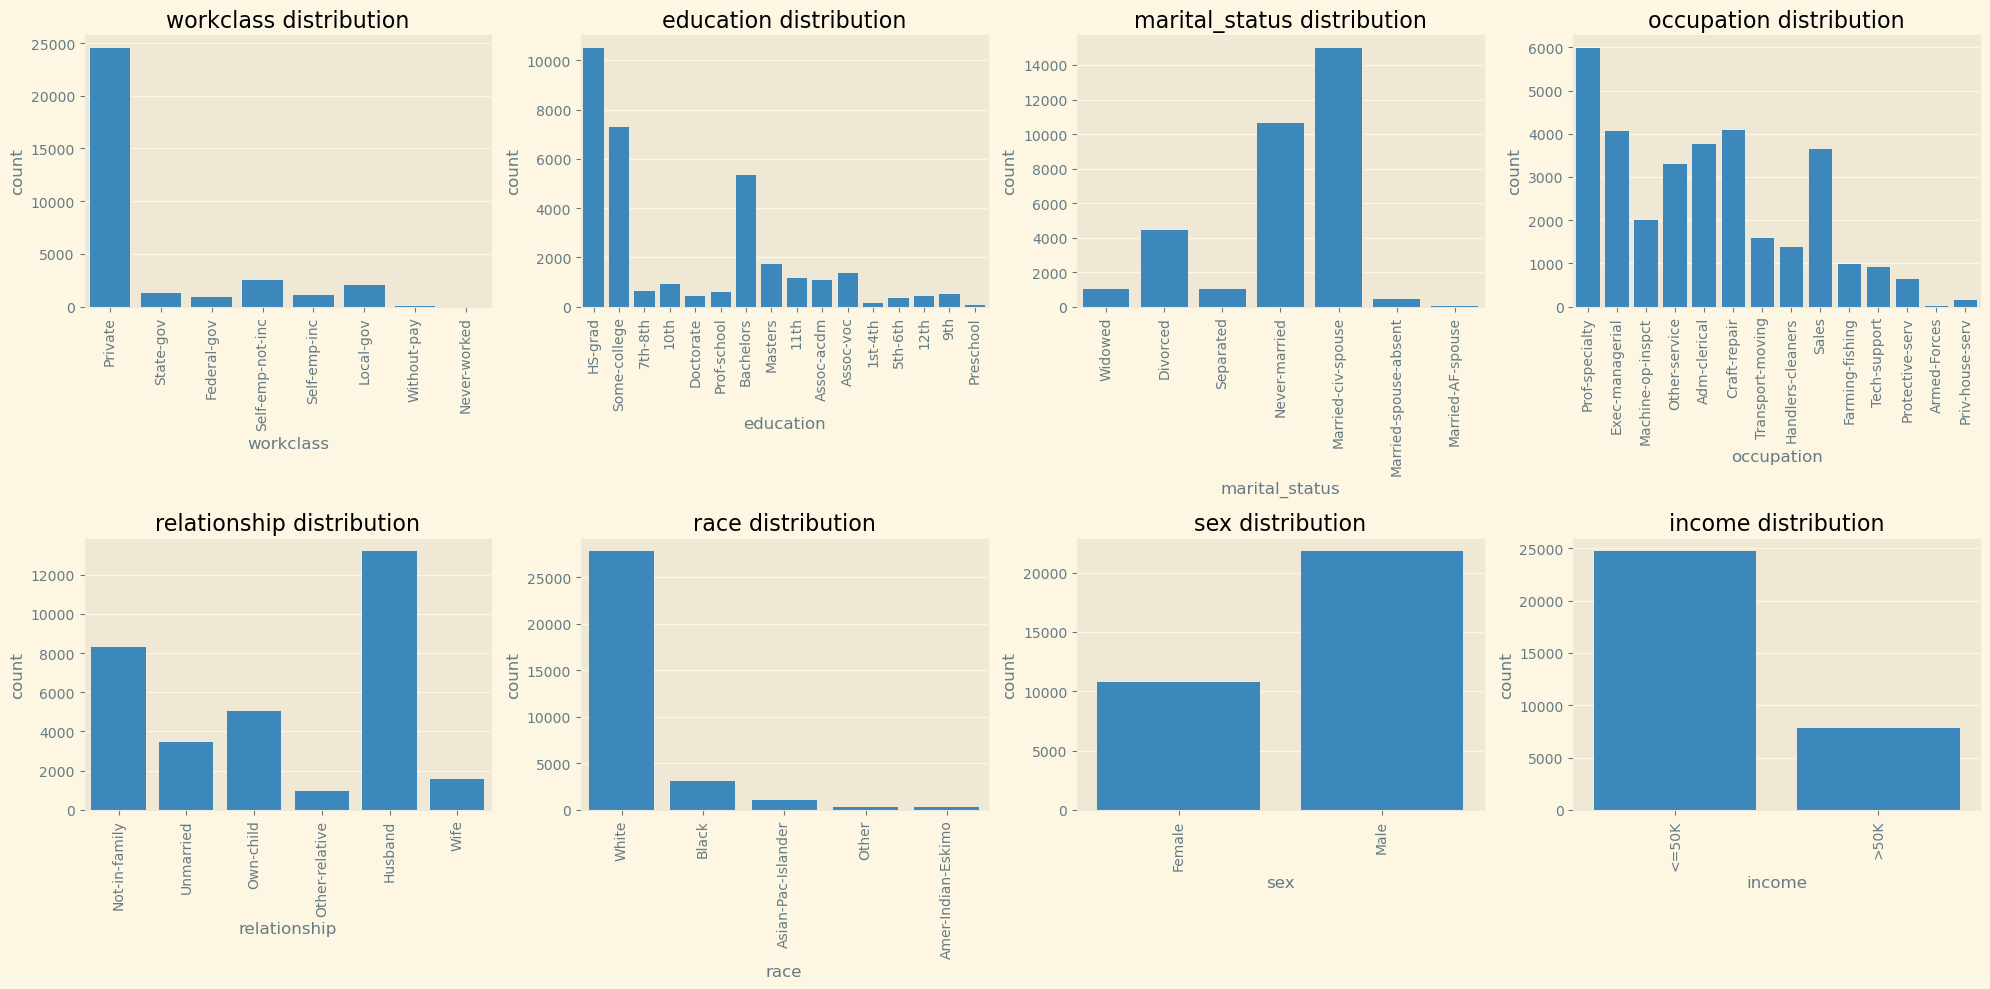

In [95]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,10))

c1 = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex','income']

for i in range (0, len(c1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[c1[i]])
    plt.xticks(rotation=90)
    plt.title(f'{c1[i]} distribution')
    plt.tight_layout()

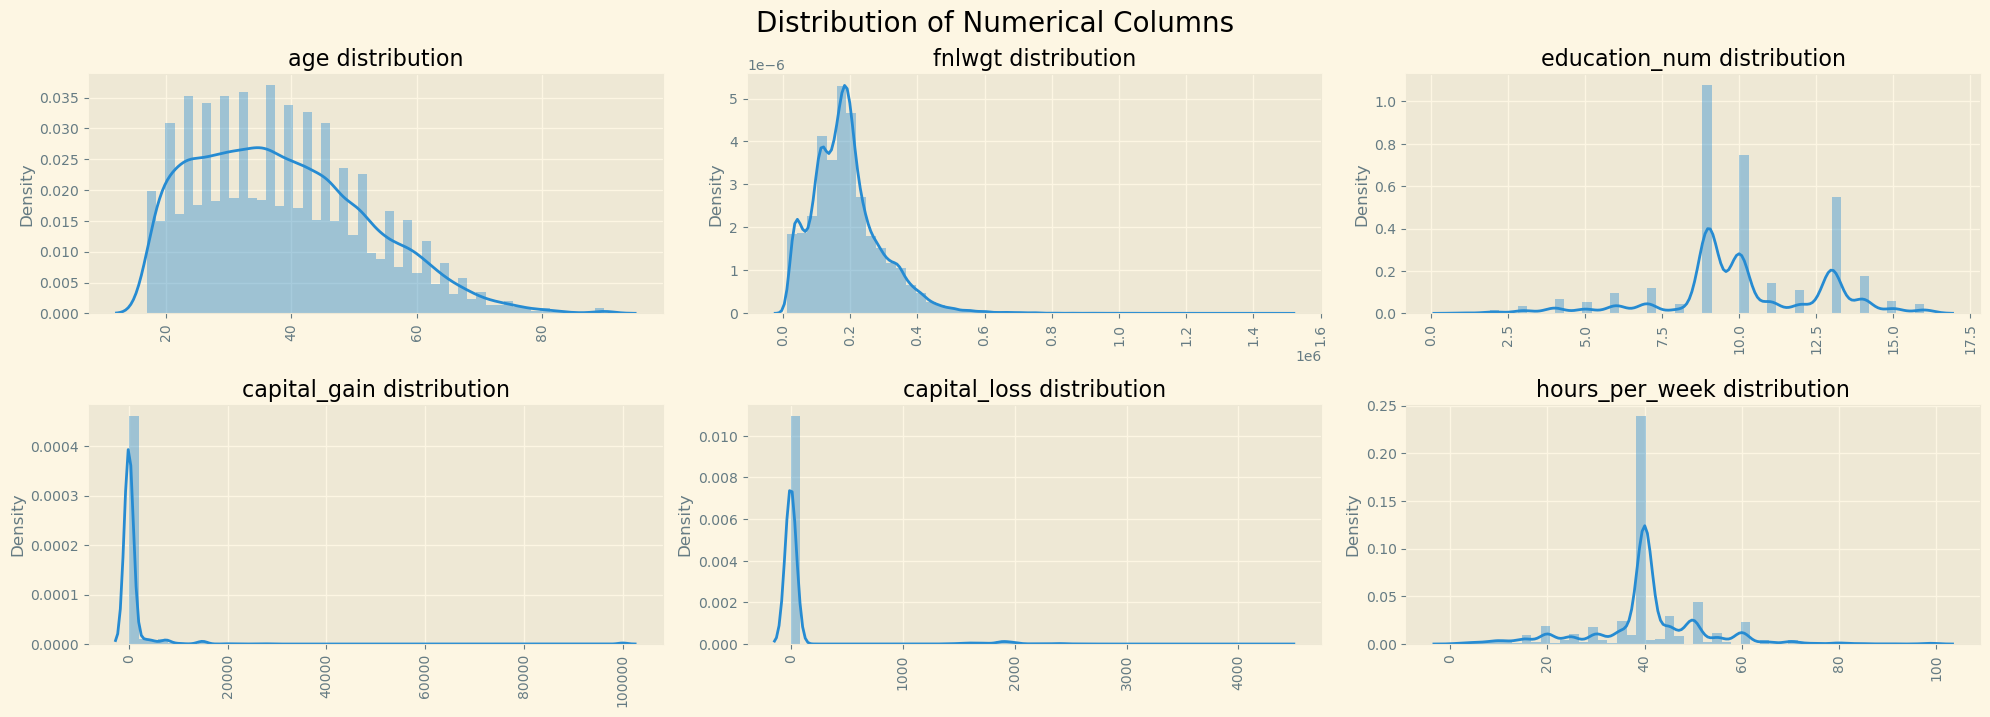

In [96]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,10))

plt.suptitle('Distribution of Numerical Columns', fontsize=20)
for i in range (0, len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.title(f'{numerical_features[i]} distribution')
    plt.xticks(rotation=90)
    plt.tight_layout()

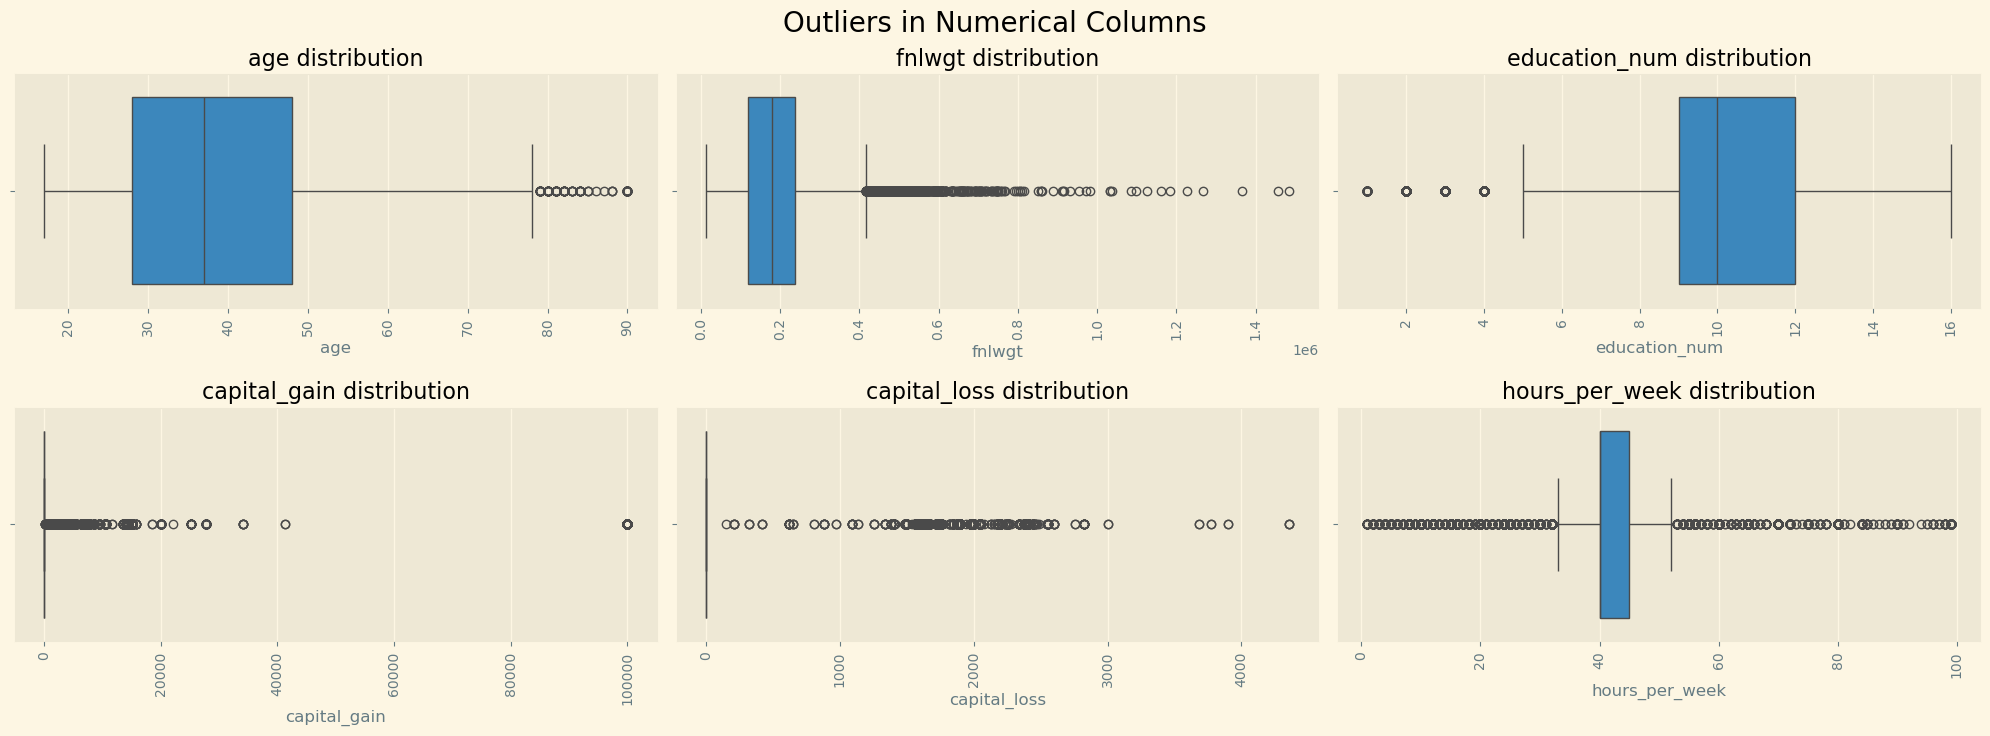

In [97]:
# Check for outliers in numerical columns
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,10))
plt.suptitle('Outliers in Numerical Columns', fontsize=20)
for i in range (0, len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.title(f'{numerical_features[i]} distribution')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [98]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<Axes: xlabel='income'>

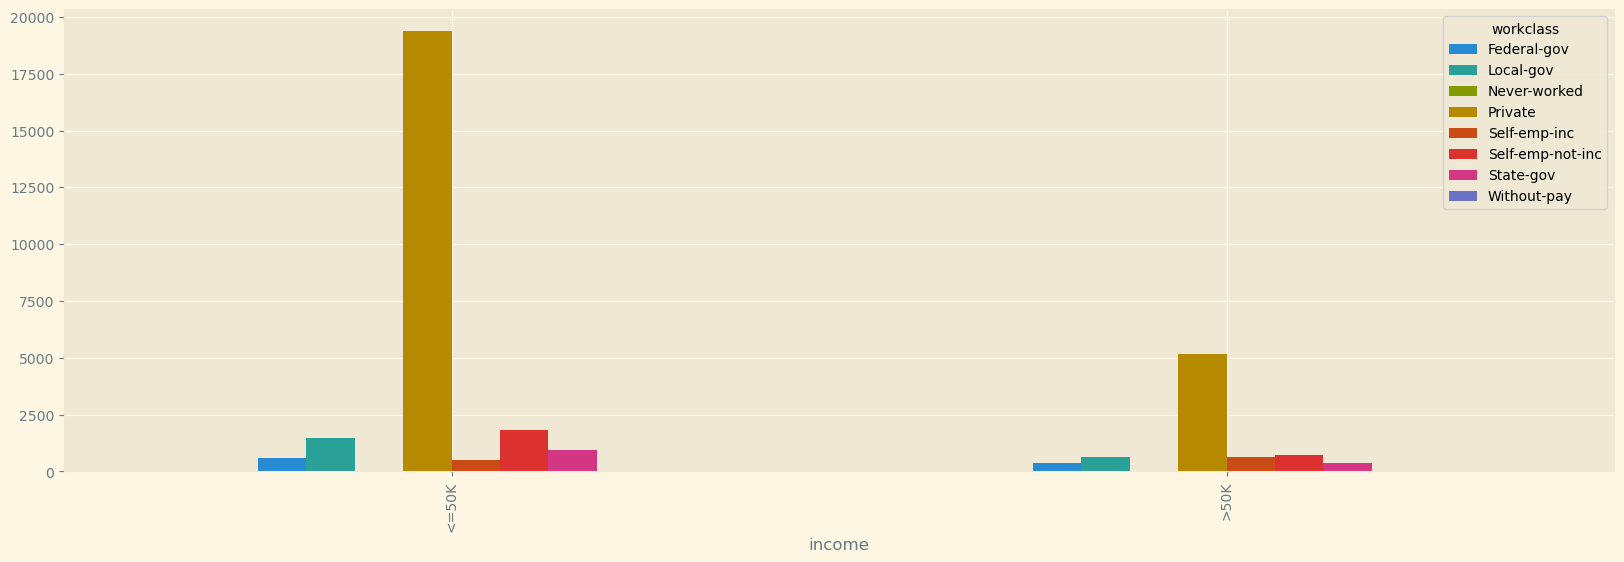

In [99]:
salary = pd.crosstab(data['income'], data['workclass'])
salary.plot(kind='bar', stacked=False, figsize=(20,6))

<Axes: xlabel='income'>

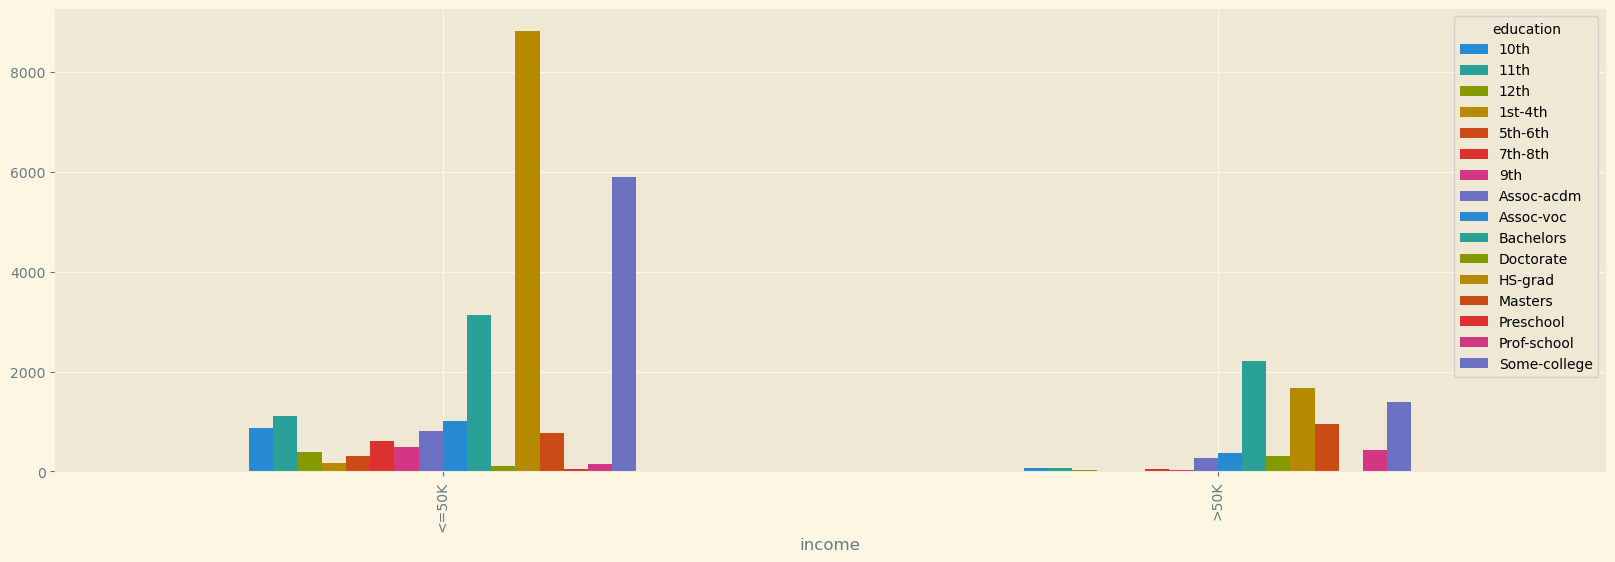

In [100]:
salary = pd.crosstab(data['income'], data['education'])
salary.plot(kind='bar', stacked=False, figsize=(20,6))

<Axes: xlabel='income'>

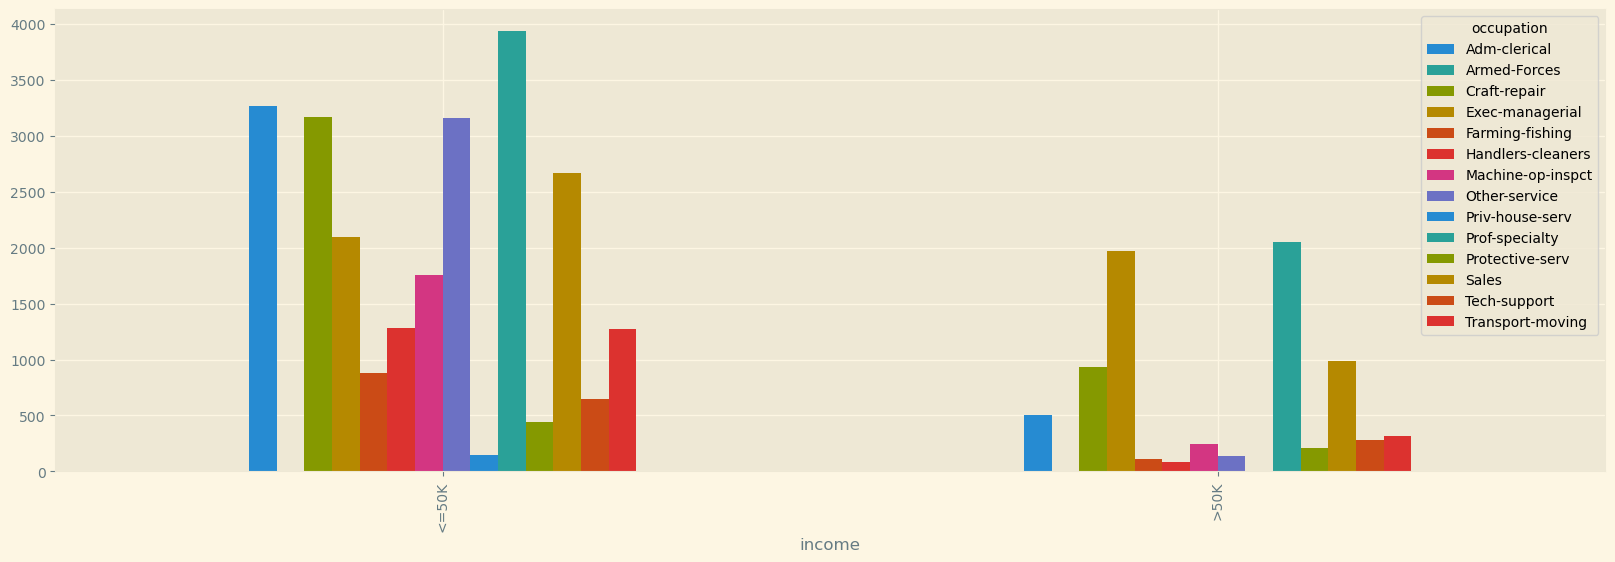

In [101]:
salary = pd.crosstab(data['income'], data['occupation'])
salary.plot(kind='bar', stacked=False, figsize=(20,6))

<Axes: xlabel='income'>

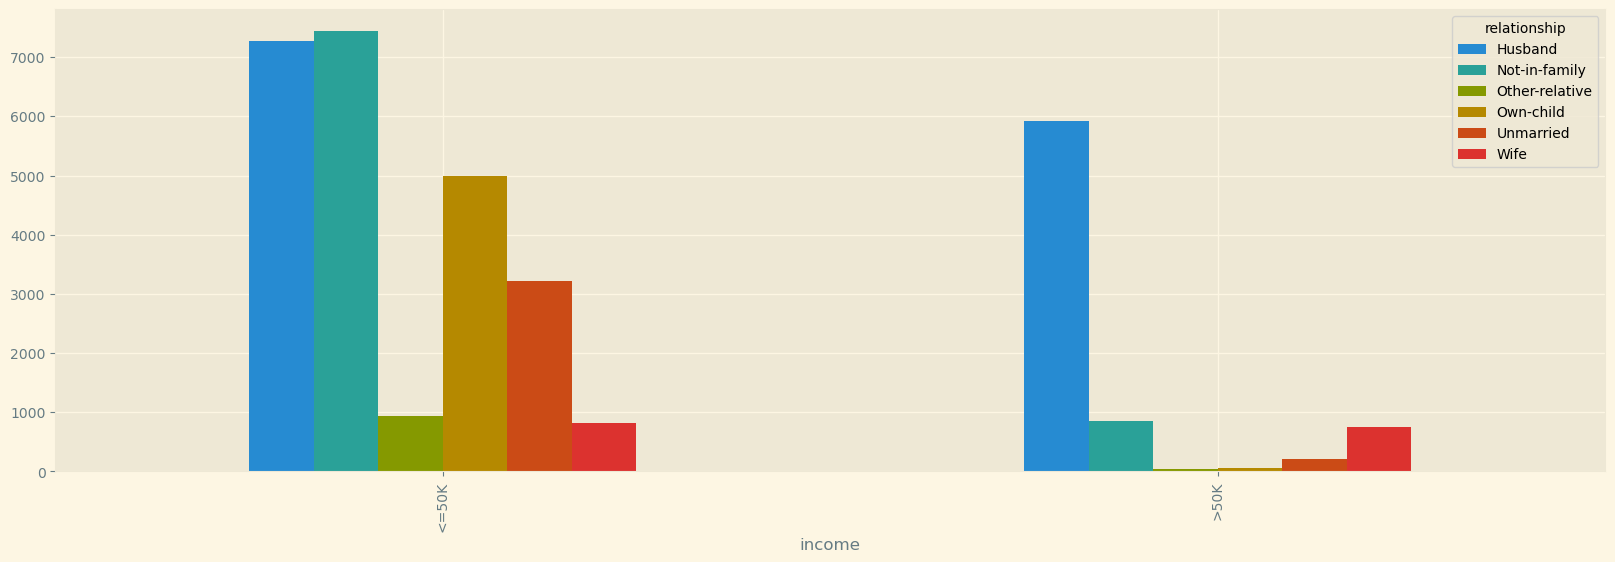

In [102]:
salary = pd.crosstab(data['income'], data['relationship'])
salary.plot(kind='bar', stacked=False, figsize=(20,6))

<Axes: xlabel='income'>

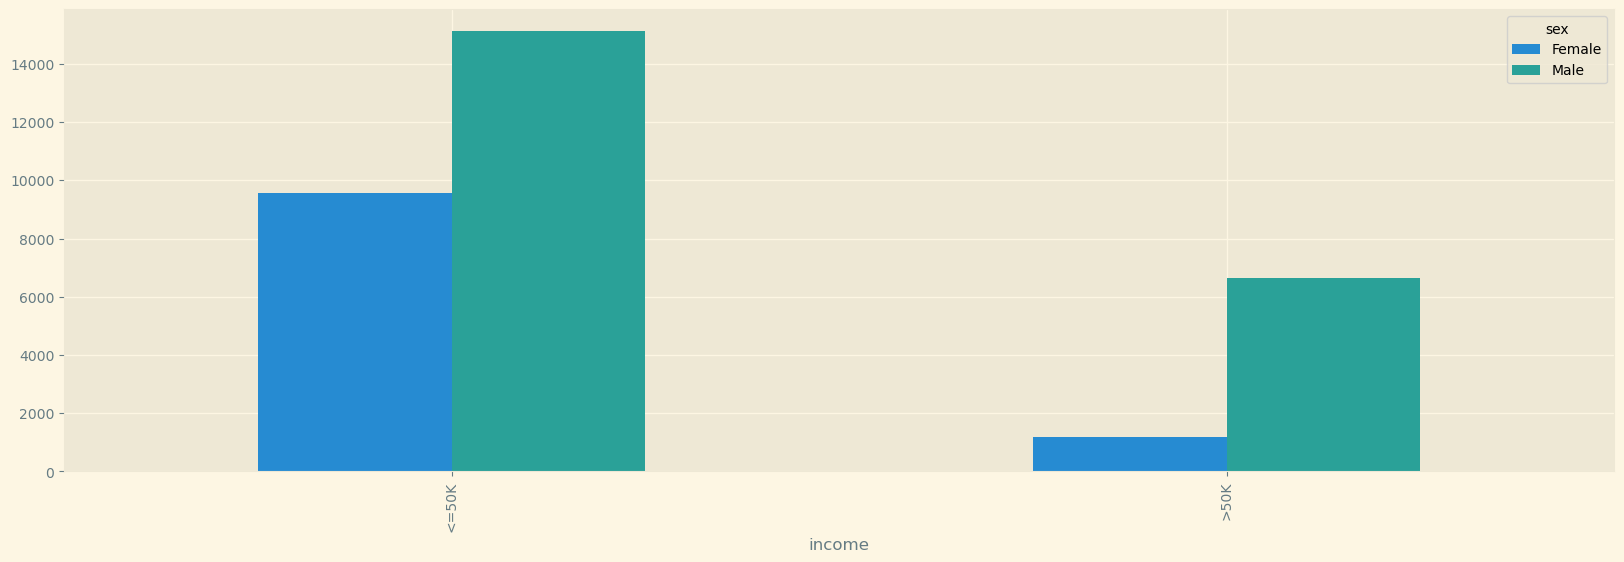

In [103]:
salary = pd.crosstab(data['income'], data['sex'])
salary.plot(kind='bar', stacked=False, figsize=(20,6))

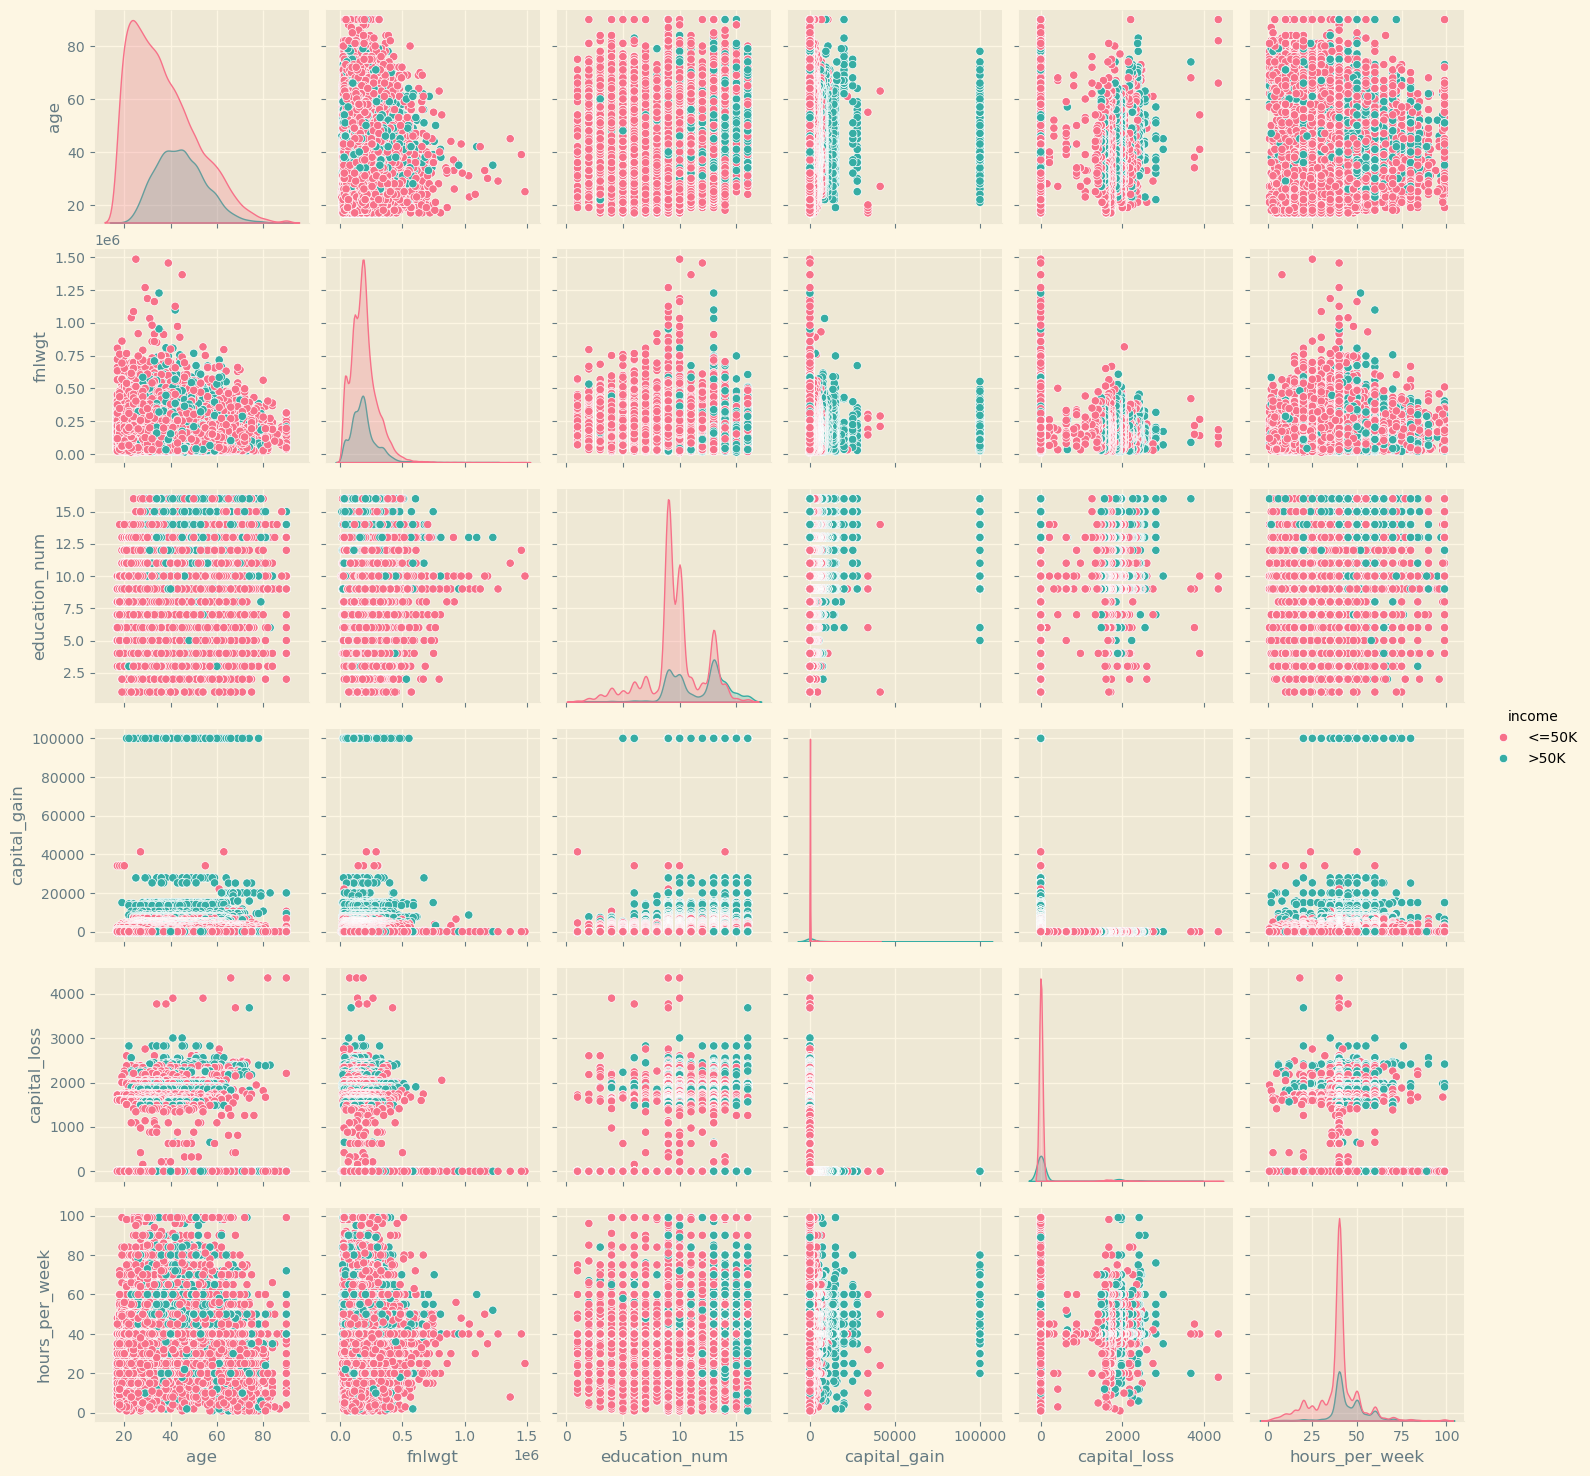

In [104]:
# pairplot of numerical columns with hue as income
sns.pairplot(data, hue='income', palette='husl')

Data Preprocessing

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])

In [106]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


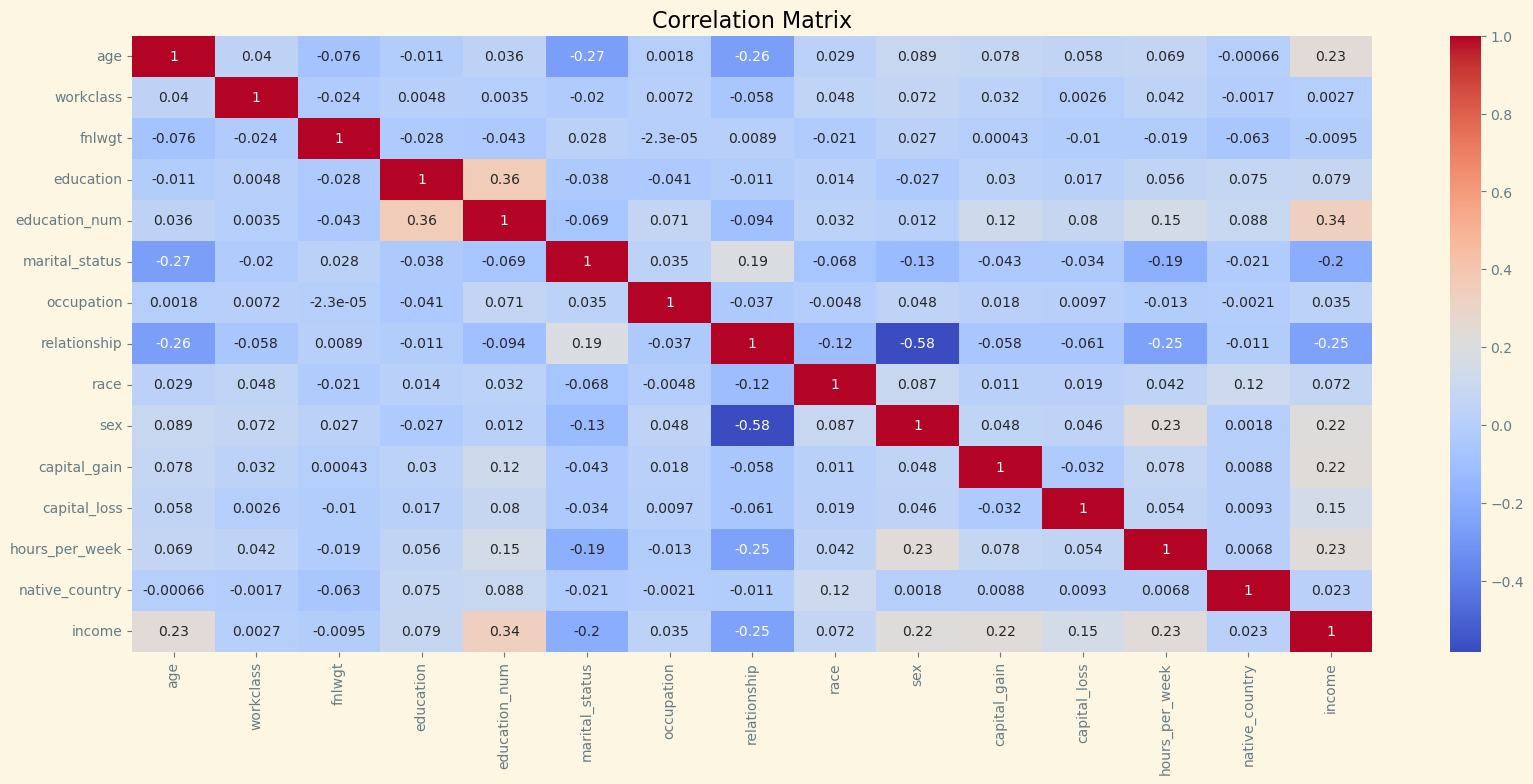

In [107]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [108]:
data['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [109]:
data.drop(['education', 'native_country', 'fnlwgt'], axis=1, inplace=True)
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,3,9,6,9,1,4,0,0,4356,40,0
1,82,3,9,6,3,1,4,0,0,4356,18,0
2,66,3,10,6,9,4,2,0,0,4356,40,0
3,54,3,4,0,6,4,4,0,0,3900,40,0
4,41,3,10,5,9,3,4,0,0,3900,40,0


Model Training

In [110]:
data.shape

(32537, 12)

In [111]:
X = data.drop('income', axis=1)
y = data['income']

In [112]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns
print(categorical_features)
print(numerical_features)

# nothing in categorical_features because we have already converted them to numerical

Index([], dtype='object')
Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [114]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
]) # to standardize the numerical columns into a standard normal distribution

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('std_scaler', StandardScaler())
]) # to fill the missing values in categorical columns with mode

full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_features),
])

In [115]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 11)
(6508, 11)
(26029,)
(6508,)


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

In [118]:
def performance_metrics(y_test, y_pred):
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

Use Hyperparameter Tuning

In [119]:
# Using Logistic Regression
lr = LogisticRegression()

In [120]:
params = {
    'class_weight': ['balanced', None],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

In [121]:
grid = GridSearchCV(estimator=lr, param_grid=params, cv=5, n_jobs=-1, verbose=3)

In [122]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [123]:
grid.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

In [124]:
grid.score(X_train, y_train)

0.8244650197856237

In [125]:
y_pred = grid.predict(X_test)

In [126]:
performance_metrics(y_test, y_pred)

Accuracy Score: 0.8257529194837123
F1 Score: 0.5531914893617021
Recall Score: 0.4618421052631579
Precision Score: 0.6895874263261297
Confusion Matrix: 
[[4672  316]
 [ 818  702]]


In [127]:
# Using Decision Tree Classifier
dt = DecisionTreeClassifier()

In [128]:
params = {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3,4,5, 6, 8, 10],
    'min_samples_split': [2, 3,4,5, 10],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [129]:
grid = GridSearchCV(estimator=dt, param_grid=params, cv=5, n_jobs=-1, verbose=3)

In [130]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [131]:
grid.best_params_

{'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'best'}

In [132]:
grid.score(X_train, y_train)

0.8543547581543662

In [133]:
y_pred = grid.predict(X_test)

In [134]:
performance_metrics(y_test, y_pred)

Accuracy Score: 0.8455746773202213
F1 Score: 0.6409431939978564
Recall Score: 0.5901315789473685
Precision Score: 0.7013291634089132
Confusion Matrix: 
[[4606  382]
 [ 623  897]]


In [135]:
# Using Random Forest Classifier
rf = RandomForestClassifier()

In [136]:
params = {
    'class_weight': ['balanced', None],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3,4,5, 6, 8, 10],
    'min_samples_split': [2, 3,4,5, 10],
}

In [137]:
grid = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, verbose=3)

In [138]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [139]:
grid.best_params_

{'class_weight': None,
 'max_depth': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [140]:
grid.score(X_train, y_train)

0.8669560874409312

In [141]:
y_pred = grid.predict(X_test)
performance_metrics(y_test, y_pred)

Accuracy Score: 0.8633988936693301
F1 Score: 0.6547572815533981
Recall Score: 0.5546052631578947
Precision Score: 0.7990521327014218
Confusion Matrix: 
[[4776  212]
 [ 677  843]]


Done!